# Title: Thomas Fire Analysis: AQI and False Color Image
By Caitlin Nordheim-Maestas

Link to github repo: https://github.com/cnordheim-maestas/eds-220-hwk4-task3-Presentation-ready-repo.git

## About

Your notebook must include an about section with the following subsections: 

### Purpose
Purpose here

### Highlights of analysis. 
For example:
- Fetch vector data from an online repository
- Visualize raster data
- Time series analysis
- etc
- Dataset description
- References to datasets.

The rest of your notebook should be organized into logical subsections for the analysis/visualization you are performing. Your analysis and data wrangling should include checks to show you’ve verified your output. These are some sections your could include:
1. Importing data
2. Geographical context of data
3. Data exploration
4. Analysis
- Include subsections as necessary to guide reader through your analysis
- Include checks to see operations worked
- Checks must be short and informative: print specific attributes instead
of running df.head() or printing entire objects.
5. Final output

## AQI (1): Importing libraries and data

In [ ]:
# Import libraries and functions
import pandas as pd # data manipulation & analysis

In [71]:
# import AQI 2017 data
# using the pandas read_csv function
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_17.head(2) # check it imported by viewing top 2 rows

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1


In [5]:
# import AQI 2018 data
# using the pandas read_csv function
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')
aqi_18.head(2) # check it imported by viewing top 2 rows

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1


## AQI (2) Data cleaning and geographical context of data

In [72]:
# AQI data
# glue the 2017 and 2018 files together using concatenate
aqi = pd.concat([aqi_17, aqi_18])
print('number of columns in merged dataset: ', len(aqi))
print('expecting this number of rows: ', len(aqi_17) + len(aqi_18))

# clean column names: make all lower case and replace spaces with underscores
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')
print('updated column names: ', aqi.columns.values) # confirm updated column names

# subset Santa Barbara: select rows where the county_name is santa barbara only
aqi_sb=aqi.loc[aqi.county_name=="Santa Barbara"]
print('unique counties in santa barbara subset (expecting only Santa Barbara): ', aqi_sb.county_name.unique())

# drop unecessary columns from subset: drop 'state_name', 'county_name', 'state_code' and 'county_code' columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code','county_code'])
print('updated column names in sb subset: ', aqi_sb.columns.values) # confirm updated column names

# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)
print('the data type for the date is now: ', aqi_sb.date.dtypes)

# set date coumn as index
aqi_sb = aqi_sb.set_index('date')
aqi_sb.head(2) # check new index

number of columns in merged dataset:  654338
expecting this number of rows:  654338
updated column names:  ['state_name' 'county_name' 'state_code' 'county_code' 'date' 'aqi'
 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting']
unique counties in santa barbara subset (expecting only Santa Barbara):  ['Santa Barbara']
updated column names in sb subset:  ['date' 'aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting']
the data type for the date is now:  datetime64[ns]


,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,36,Good,Ozone,06-083-4003,11


## AQI (3): Data Exploration

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   aqi                        730 non-null    int64 
 1   category                   730 non-null    object
 2   defining_parameter         730 non-null    object
 3   defining_site              730 non-null    object
 4   number_of_sites_reporting  730 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 34.2+ KB
None
            aqi category defining_parameter defining_site  \
date                                                        
2017-01-01   39     Good              Ozone   06-083-4003   
2017-01-02   36     Good              Ozone   06-083-4003   

            number_of_sites_reporting  
date                                   
2017-01-01                         12  
2017-01-02                         11  
the range of aqi values is:  20

<AxesSubplot:title={'center':'Exploratory plot of SB AQI dataset'}, xlabel='date'>

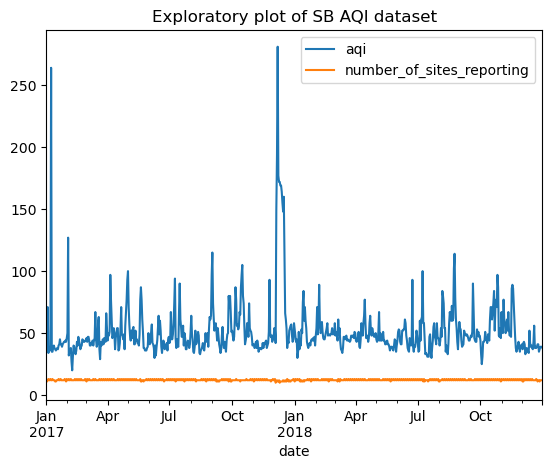

In [73]:
# AQI data
# Let's explore the cleaned aqi data, that just has Santa Barbara, and includes 2017 and 2018

# use the .info() function to see the datatypes, number of entries, and timeframe in the datetime index
print(aqi_sb.info())

# look at top 2 rows of data
print(aqi_sb.head(2))

# for fun, let's look at the range of the aqi values
print('the range of aqi values is: ', aqi_sb.aqi.min(), '-', aqi_sb.aqi.max())

aqi_sb.plot(title="Exploratory plot of SB AQI dataset") #preliminary plot

## AQI (4): Analysis

In [74]:
# AQI analysis
# Broad goal: Determine if and how the AQI changes through time 2017-2018
# More specifically, does the average 5-day AQI show any important patterns throughout 2017-2018, keeping the thomas fire in mind?

# Analysis: calculate the 5-day rolling average and add it as a column

# add column with 5 day average AQI and calculate the 5 day rolling average using the "rolling" function
# '5D' corresponds to 5 day
# .mean() because we want the average
# adding a column using the syntax on the left

aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# let's check that it worked! 
print('updated column names (checking the five_day_average showed up): ', aqi_sb.columns.values) # confirm updated column names
# let's check the range of average values
print('the range of aqi 5 day average values is: ', aqi_sb.five_day_average.min(), '-', aqi_sb.five_day_average.max())
# last check, let's look at the first row
print(aqi_sb.head(1))

updated column names (checking the five_day_average showed up):  ['aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting' 'five_day_average']
the range of aqi 5 day average values is:  30.4 - 199.2
            aqi category defining_parameter defining_site  \
date                                                        
2017-01-01   39     Good              Ozone   06-083-4003   

            number_of_sites_reporting  five_day_average  
date                                                     
2017-01-01                         12              39.0  


<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

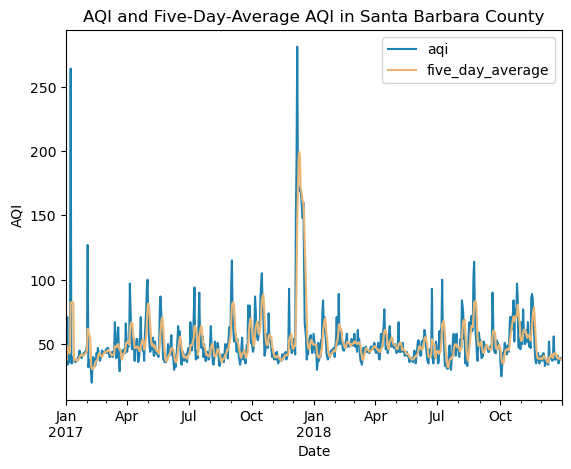

In [75]:
# AQI Analysis continued: let's plot!
# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

## False Color Image (1): Importing libraries and data

In [1]:
# Import libraries and functions
import os # accessible file paths
import numpy as np # math operations
import pandas as pd # data manipulation & analysis
import geopandas as gpd # geospatial data manipulation
from shapely.geometry import Polygon
import xarray as xr # for n-dimmensional array data
import rioxarray as rioxr # for geospatial n-dimmensional array data
from rasterio.features import rasterize # for rasterizing polygons
# plotting
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for pretty legends

In [6]:
# import landsat data
# using rasterio 
# use the os to get the current working directory
land_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
land = rioxr.open_rasterio(land_fp) # use this for geospatial raster data
land # check it imported

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [8]:
# fire perimeters in California during 2017
# using geopandas
# use the os to get the current working directory
fire_fp = os.path.join(os.getcwd(),'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp')
fire = gpd.read_file(fire_fp) # use gpd to read the file because it's a shapefile
fire.head(2) # check it imported by viewing top 2 rows

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."


## False Color Image (2): Data cleaning and geographical context of data

In [49]:
# Landsat data cleaning and geographic context
# Raster reduction: drop the bands in land data

# remove length 1 dimension (band)
land = land.squeeze()

# remove coordinates associated to band
land = land.drop('band')
land

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

In [52]:
# Fire perimeters data cleaning

# make sure CRS' match
fire_reprojected = fire.to_crs(land.rio.crs) # change to the land crs
print('matched crs?',  fire_reprojected.crs == land.rio.crs) # ensure they match

# subset only thomas fire
fire_clipped = fire_reprojected[(fire_reprojected.FIRE_NAME=='THOMAS')]
fire_clipped.head() # check that it worked

matched crs? True


,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
436,20274,41874,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,...,281790.875,CONT_DATE based on Inciweb,None,None,None,None,2010,540531.887458,1.681106e+09,"MULTIPOLYGON (((259241.263 3814482.913, 259193..."


## False Color Image (3) Data Exploration

In [48]:
# Landsat data exploration
# check crs, height, width, bounding box
print('CRS: ', land.rio.crs)
print('height: ', land.rio.height)
print('width: ', land.rio.width, '\n')

print('spatial bounding box: ')
print(land.rio.bounds(), '\n')

# look at the data
land

CRS:  EPSG:32611
height:  731
width:  870 

spatial bounding box: 
(121170.0, 3755160.0, 356070.0, 3952530.0) 



<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

original crs:  epsg:3857 updated crs:  PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       608 non-null    int64   
 1   OBJECTID    608 non-null    int64   
 2   YEAR_       608 non-null    object  
 3   STATE       608 non-null    object  
 4   AGENCY      608 non-null    object  
 5   UNIT_ID     608 non-null    object  
 6   FIRE_NA

<AxesSubplot:>

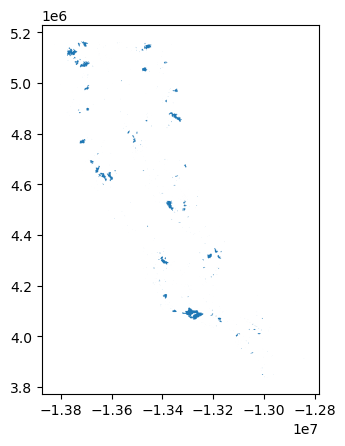

In [64]:
# Fire perimeters data exploration
# check original crs and updated crs:
print('original crs: ',  fire.crs, 'updated crs: ', fire_clipped.crs)

# let's get some info on the original and updated datasets
print('original dataset info: ', fire.info())
print('updated dataset info: ', fire_clipped.info())

# data exploration continued
# let's compare the full dataset to the dataset with only thomas fire
fire.plot() # whole dataset

<AxesSubplot:>

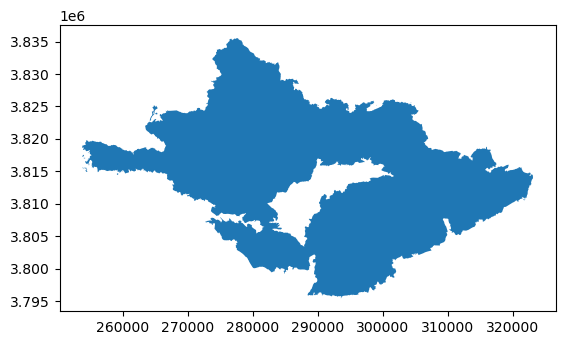

In [56]:
# data exploration continued
fire_clipped.plot() # just the thomas fire

## 4. Analysis

updated column names (checking the five_day_average showed up):  ['aqi' 'category' 'defining_parameter' 'defining_site'
 'number_of_sites_reporting' 'five_day_average']
the range of aqi 5 day average values is:  30.4 - 199.2
            aqi category defining_parameter defining_site  \
date                                                        
2017-01-01   39     Good              Ozone   06-083-4003   

            number_of_sites_reporting  five_day_average  
date                                                     
2017-01-01                         12              39.0  


<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

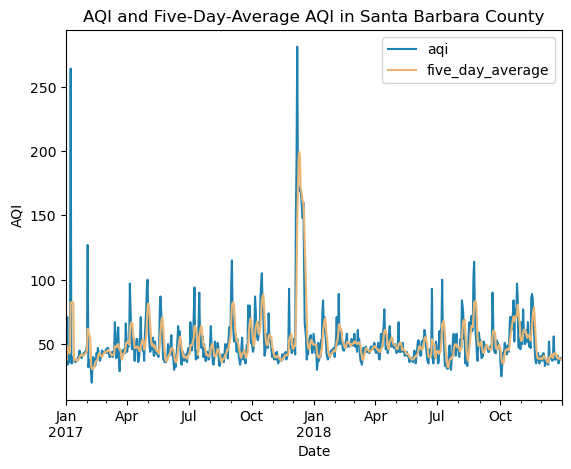

<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

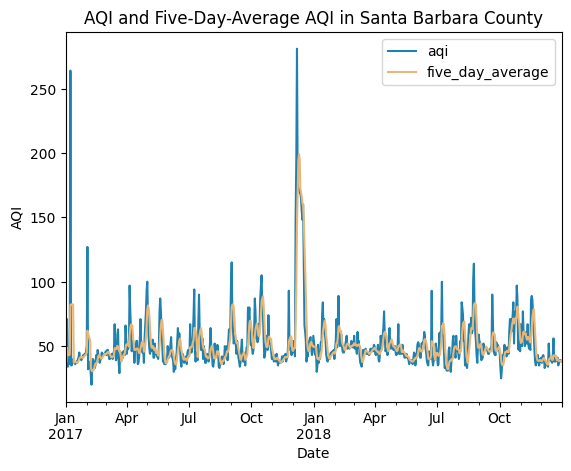

In [1]:
### ===== FINAL CODE =====

# add column with 5 day average AQI and calculate the 5 day rolling average using the "rolling" function
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

## 5. Final output